## Multiple Linear Regression

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Multiple Linear Regression (MLR)
- MLR is an extension of simple linear regression
- MLR is an is a statistical technique 
- MLR is used to establish the relationship between two continuous variables that is used to analyze the relationship between a dependent variable and two or more independent variables

### Steps for Creating a Linear Regression:

1. **Data Sourcing** Gather data on both the independent variable (X) and the dependent variable (Y). Ensure that both variables are continuous.
2. **Plot the data:** Plot the data on a scatter plot. This will give you a visual representation of the relationship between the two variables.
3. **Determine the type of relationship:** Examine the scatter plot to determine if there is a linear relationship between the two variables. If there is, linear regression is appropriate.
4. **Choose the model:** Choose the appropriate model for your data. For example, if you have one independent variable and one dependent variable, you will use simple linear regression. If you have multiple independent variables and one dependent variable, you will use multiple linear regression.
5. **Calculate the regression equation:** Use statistical software to calculate the regression equation. The equation will take the form of Y = a + bX, where Y is the dependent variable, X is the independent variable, a is the intercept, and b is the slope.
6. **Assess the goodness of fit:** Use statistical tests such as R-squared, adjusted R-squared, and F-test to assess the goodness of fit of your model. This will tell you how well your model fits the data.
7. **Make predictions:** Once you have a good fit, you can use the regression equation to make predictions about the dependent variable based on the independent variable.
8. **Interpret the results:** Finally, interpret the results of the analysis in light of the research question. Determine whether the relationship between the two variables is significant and what it means in practical terms.


                                                                         Author by:
                                                                                Dr. Manjunath M
                                                                                www.linkedin.com/in/dr-manjunath-m

### Step 1: Data Sourcing
####  1.1 Importing Packages python package for analysing the Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. 2 Loading the Bile Dataset using following code

In [2]:
df = pd.read_csv("day.csv")

####  1.3 Displaying Top Five records of Bike Sharing DataFrame


In [3]:
df.head()  ## Displaying Top 5 records of Bike Sharing DataSet

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 1. 4 Analying the Number of Rows and Columns using shape attribute

In [4]:
df.shape   ## We can observe that, there are 730 rows and 16 columns in the Bike Sharing dataset

(730, 16)

#### 1.5 Displaying Information about the Bike Sharing DataFrame using info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### 1.6   Analysing missing values, Not a Number (NaN) values in each columns and row

In [6]:
df.isna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 1.7 Analysisng the null values in each column of Bike Sharing Dataset


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 1.8 Displaying Description About the Bike Sharing DataFrame using describe()

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### 1.9 Analysisng the Columns which are Relavent to the Problem Statement


In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### 1.20 Droping columns which are Redundant  to Bike Sharing Dataset

In [10]:
#from the given data set and data dictionary we can observe that instant is an index column,  
# so can drop redundant column using following command

df.drop(['instant'],axis=1,inplace=True)

In [11]:
#from the given data set and data dictionary we can observe the dteday column and yr month are having same data  
# so can drop redundant column using following command
df.drop(['dteday'],axis=1,inplace=True)

In [12]:
#from the given data set and data dictionary we can observe the registered column and casual column,   
# Since cnt contain the total count of bike booked,  so can ignore this redundant column using following command
df.drop(['registered'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)

#### 1.21 Displaying Top 5 records of Bike Sharing Dataset

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### 1.22 Replacing the integer variable to categorical variable
- from dataset and the dictionary,  we can observe that: **season, yr, mnth, holiday, weekday, workingday, weathersit**  are categorical variables, hence need to replace of the said column with appropriate values and,
- Analysing the toral value of **season, yr, mnth, holiday, weekday, workingday, weathersit** column using value_counts()


In [15]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
df["season"].value_counts()  

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [17]:
df['weathersit'].replace({1:"Clear",2:"Mist Cloudy",3:"Light Snow",4:'Heavy Rain'},inplace=True)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
df["weathersit"].value_counts()

Clear          463
Mist Cloudy    246
Light Snow      21
Name: weathersit, dtype: int64

In [19]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
df["weekday"].value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

#### 1.23 Analysing the bike Sharing data for beter understanding

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### Step 2: Plotting Data
#### 2.1 Ploting pair plot of numerical variables to detect the hidden patterns of the dataset

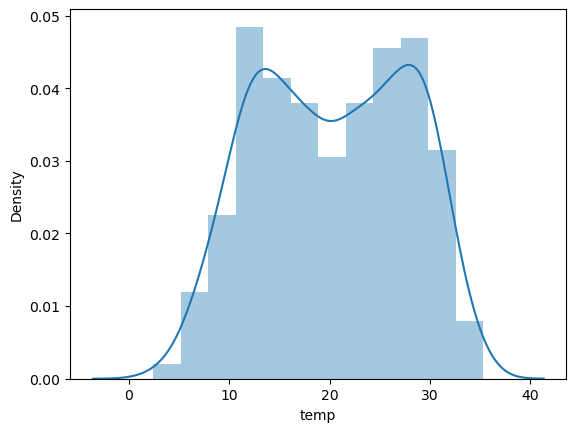

In [22]:
# Analysis of temperature varibale using distplot
sns.distplot(df['temp'])
plt.show()

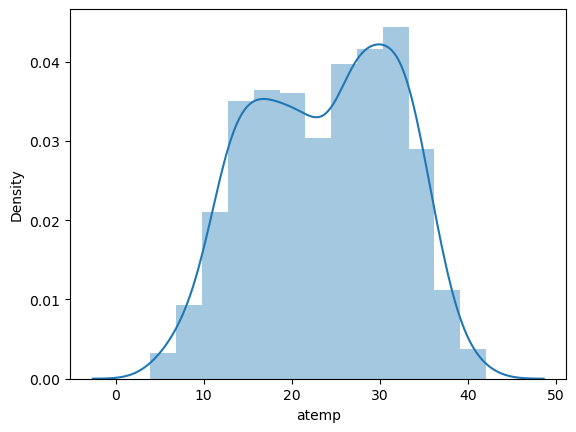

In [23]:
# Analysis of atemp varibale using distplot
sns.distplot(df['atemp'])
plt.show()

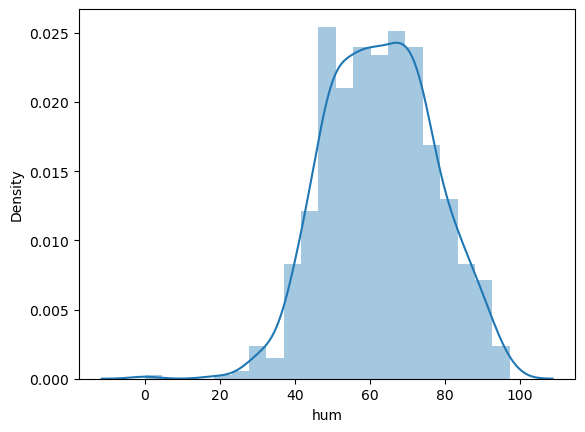

In [24]:
# Analysis of hunidity varibale using distplot
sns.distplot(df['hum'])
plt.show()

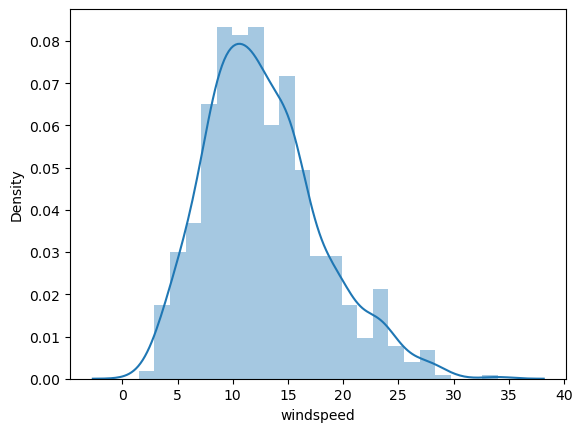

In [25]:
# Analysis of wind speed varibale using distplot
sns.distplot(df['windspeed'])
plt.show()

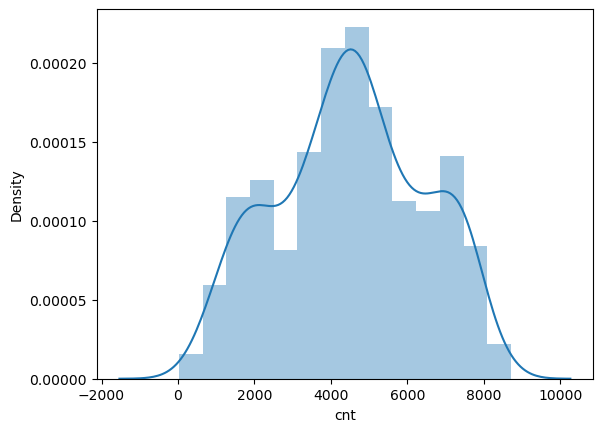

In [26]:
# Analysis of distribution of count of total rental bikes using distplot
sns.distplot(df['cnt'])
plt.show()

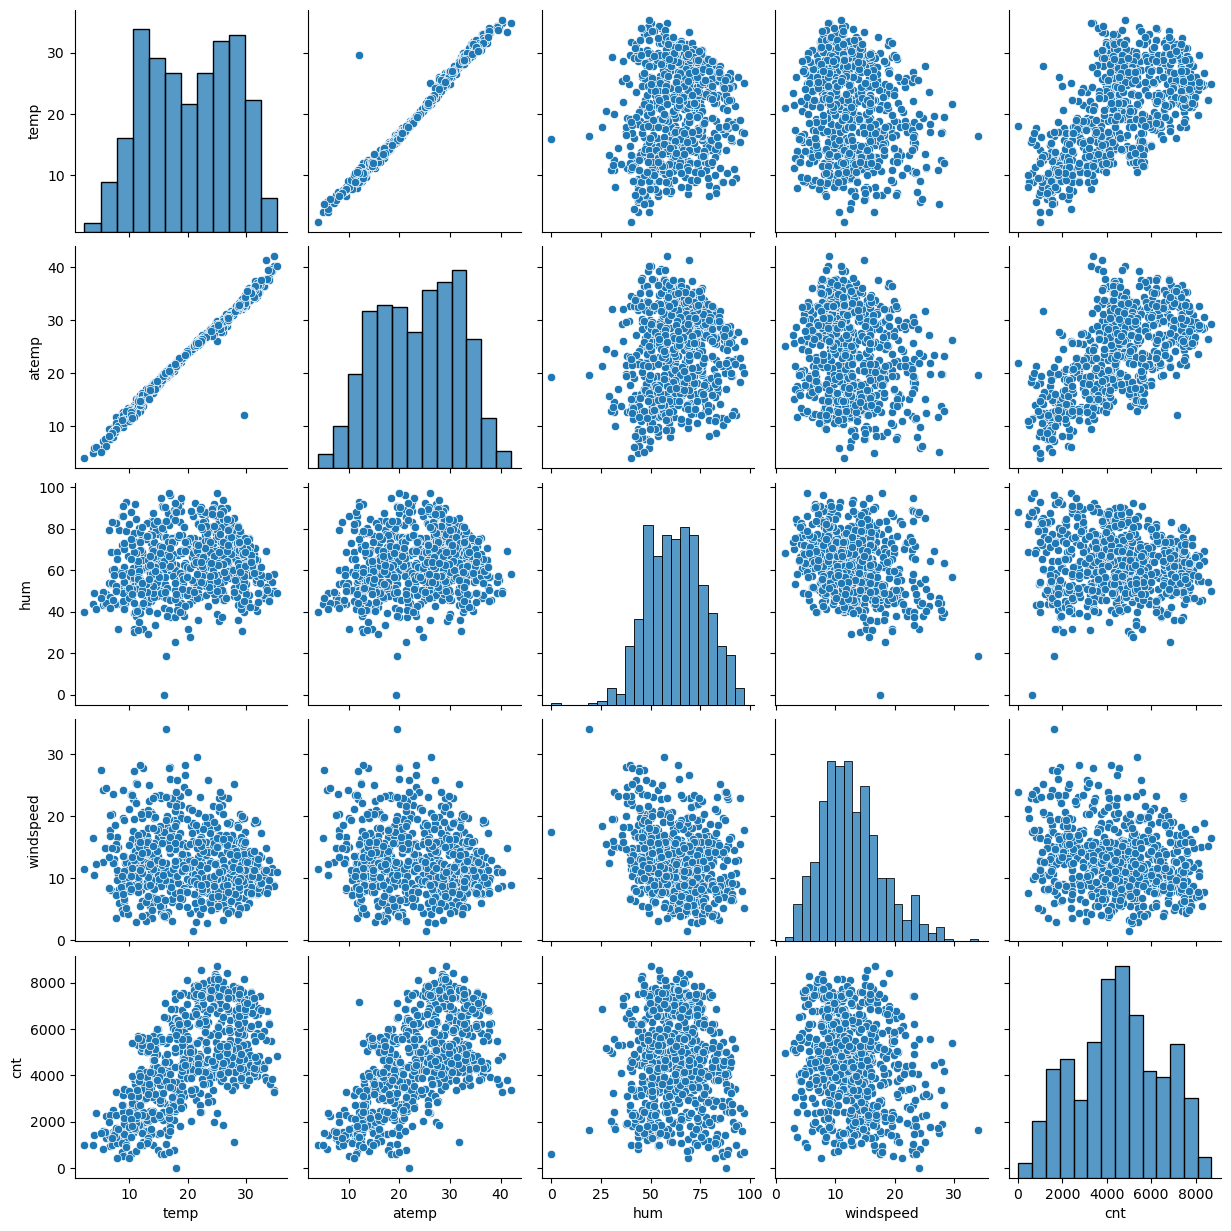

In [27]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### 2.2 Analysing the Correlation of each column using corr() 

In [28]:
df.corr()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


### 3 Determine the type of relationship
#### 3.1 Analysing the Correlation of each column using heatmap

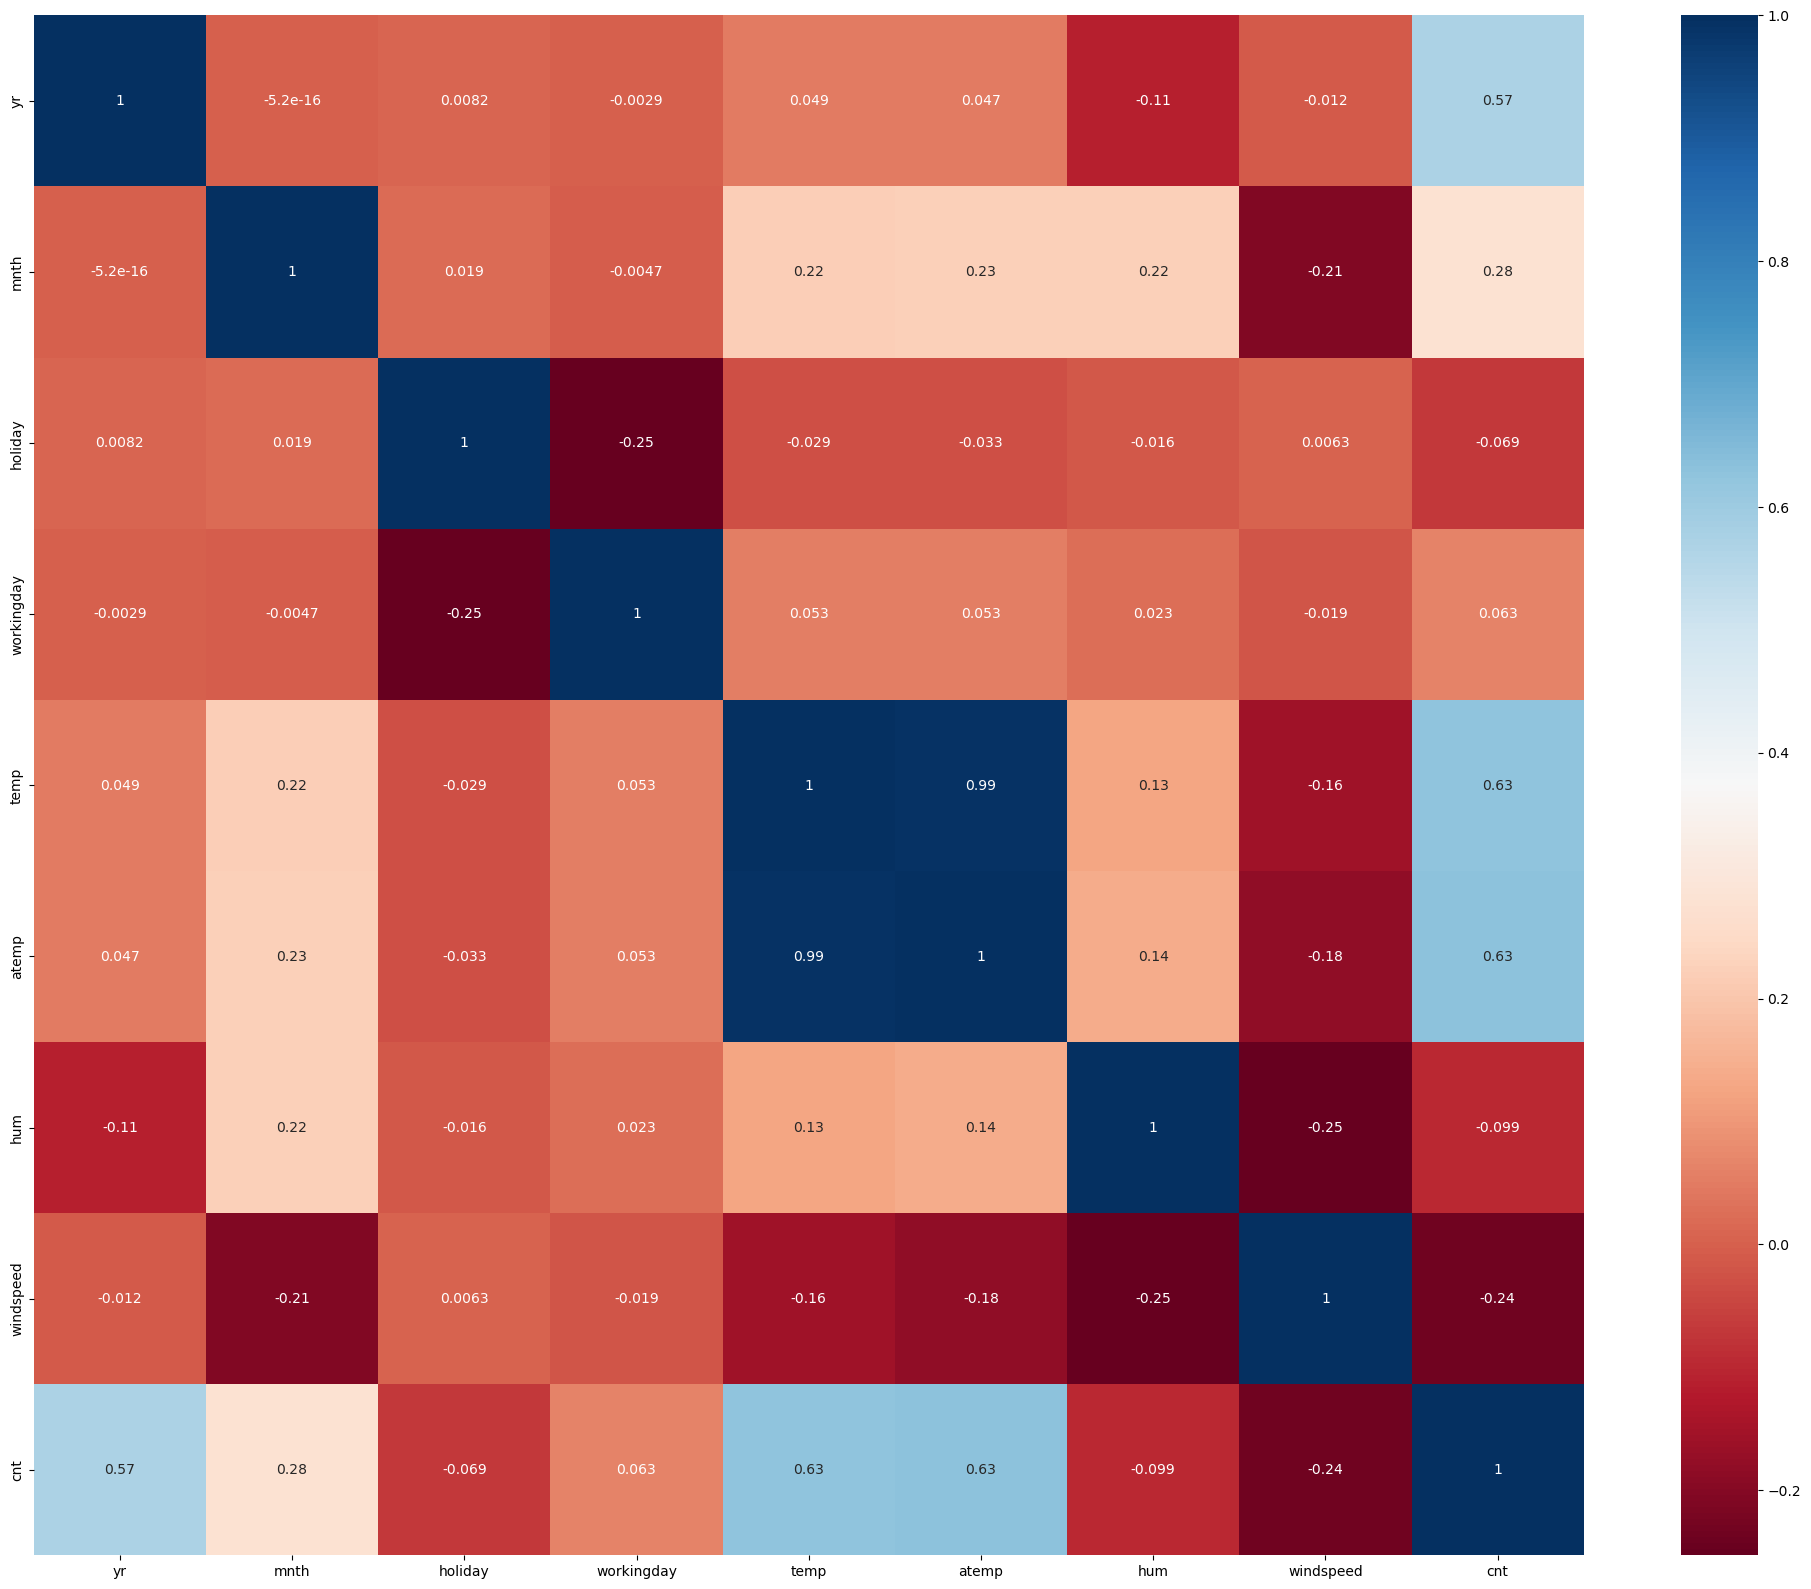

In [29]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

#### 3.2 Analysing Catagorical Variables using Boxplot

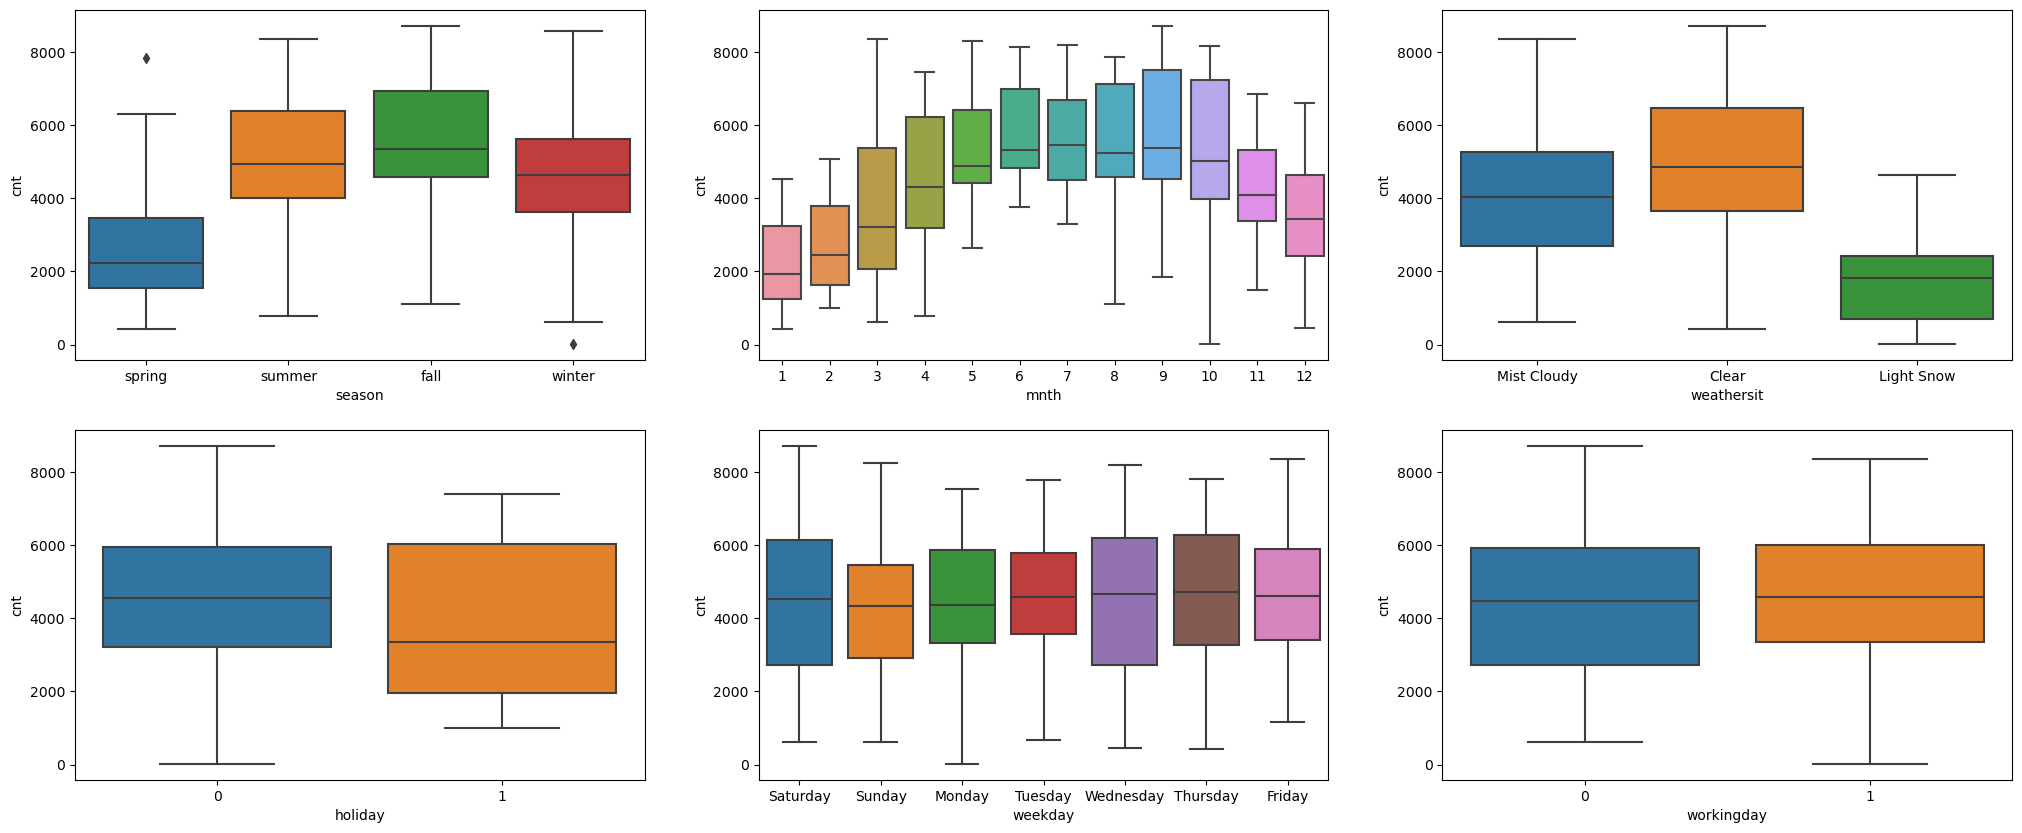

In [30]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

### 4. Choose the model
#### 4.1 Dummy Variables
-  Dummy variables are often used to encode categorical variables into a numerical format that can be processed by a learning algorithm. This is done because many machine learning algorithms only work with numerical data, and cannot handle categorical data directly

In [31]:
# Before creating dummy variables, we will have to convert them into 'category' data types. to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [32]:
## Creation of dummy variables using following code
Season_Condition=pd.get_dummies(df['season'],drop_first=True)
Weather_Condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_Week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [33]:
## Concatination of Dummy data frame (Dummy Variable) and Bike sharing data frame
df=pd.concat([df,Season_Condition],axis=1)
df=pd.concat([df,Weather_Condition],axis=1)
df=pd.concat([df,Day_of_Week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  spring       730 non-null    uint8  
 13  summer       730 non-null    uint8  
 14  winter       730 non-null    uint8  
 15  Light Snow   730 non-null    uint8  
 16  Mist Cloudy  730 non-null    uint8  
 17  Monday       730 non-null    uint8  
 18  Saturday     730 non-null    uint8  
 19  Sunday  

In [34]:
#Droping the orginal columns of season, weathersit, weekday and mnth in te bike sharing dataframe 
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2 Splitting the Data

In [35]:
### Importing sklearn pakage to split the dataset for training and test dataset
from sklearn.model_selection import train_test_split

In [36]:
### Splitting the Data into Training and Testing Sets i.e train_size as 0.70, we aim to put 70% of the data into our training set, 
### and the rest of the data into the test set.
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 100)

In [37]:
### Analysing the shape of Training and Test data frame

print(df_train.shape)
print(df_test.shape)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)
(510, 30)
(220, 30)


### 4.3 RESCALING THE FEATURES

In [38]:
from sklearn.preprocessing import MinMaxScaler    ## importing MinMaxScaler module from sklearn 

In [39]:
scaler = MinMaxScaler()    ## Creating MinMaxScaler object to rescale the feature variables

In [40]:
df_train.head()    # Displaying Top 5 Trained Dataframe 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,1,0,0,0,0,0,0,0,0


In [41]:
df_train.describe()  ## Displaying Description About the train  DataFrame using describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Applying fit_transform function using scaler to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

## 5. BUILDING A LINEAR MODEL

#### 5.1 Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))   ## List of All selected Features with ranking for modelling


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist Cloudy', True, 1),
 ('Monday', False, 12),
 ('Saturday', False, 3),
 ('Sunday', False, 11),
 ('Thursday', False, 14),
 ('Tuesday', False, 13),
 ('Wednesday', False, 15),
 (2, False, 7),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 8),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 9),
 (12, False, 10)]

In [47]:
col = X_train.columns[rfe.support_]    ### Displaying Top 15 selected variables for modelling
col

Index([         'yr',     'holiday',        'temp',         'hum',
         'windspeed',      'spring',      'winter',  'Light Snow',
       'Mist Cloudy',             3,             4,             5,
                   6,             8,             9],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]    

Index(['workingday',      'atemp',     'summer',     'Monday',   'Saturday',
           'Sunday',   'Thursday',    'Tuesday',  'Wednesday',            2,
                  7,           10,           11,           12],
      dtype='object')

In [49]:
X_train_rfe = X_train[col]   # Creating X_test dataframe with RFE selected variables

## 6. Building Linear Model  using Statsmodel
### 6.1 Model_1

In [50]:
import statsmodels.api as sm  ## importing Statsmodel 

In [51]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
print(lr1.summary())  ## Displaying OLS Regression Results   

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          2.50e-187
Time:                        22:56:34   Log-Likelihood:                 510.63
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     494   BIC:                            -921.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2889      0.034      8.599      

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  ### Importing Variance_inflation Factor module

In [54]:
### Displays the Variance_inflation Factor of feature variables

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.76
2,temp,16.08
4,windspeed,4.69
5,spring,3.61
6,winter,3.28
8,Mist Cloudy,2.27
0,yr,2.09
13,8,1.93
11,5,1.77
10,4,1.69


In [55]:
### Droping columns which as high VIF value

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

### 6.2 Model_2

In [56]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          8.25e-185
Time:                        22:56:34   Log-Likelihood:                 501.90
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     495   BIC:                            -910.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2051      0.027      7.517      

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.47
3,windspeed,4.68
4,spring,2.10
0,yr,2.08
5,winter,1.93
12,8,1.91
11,6,1.67
10,5,1.59
7,Mist Cloudy,1.55
9,4,1.53


### 6.3 Model_3

In [58]:
### Droping columns which as high VIF value
X_train_rfe=X_train_rfe.drop(['temp'],axis=1)

 
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.7
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          2.83e-153
Time:                        22:56:35   Log-Likelihood:                 424.10
No. Observations:                 510   AIC:                            -820.2
Df Residuals:                     496   BIC:                            -760.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5077      0.018     29.007      

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.96
3,spring,2.10
0,yr,1.90
4,winter,1.79
6,Mist Cloudy,1.55
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.25


### 6.4 Model_4

In [60]:
### Droping the High VIF feture variables (Since windspped has greater than 2 VIF value, so we drop it)
#Windspeed has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     135.2
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          7.03e-148
Time:                        22:56:35   Log-Likelihood:                 408.68
No. Observations:                 510   AIC:                            -791.4
Df Residuals:                     497   BIC:                            -736.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4612      0.016     29.130      

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
5,Mist Cloudy,1.54
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.09


In [62]:
### Winter has HIGH p-value and hence it can be droped
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

### 6.5 Model_5

In [63]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          6.85e-149
Time:                        22:56:35   Log-Likelihood:                 408.48
No. Observations:                 510   AIC:                            -793.0
Df Residuals:                     498   BIC:                            -742.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4539      0.011     42.522      

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.62
2,spring,1.41
4,Mist Cloudy,1.39
5,3,1.23
9,8,1.13
6,4,1.11
7,5,1.11
10,9,1.11
8,6,1.07
1,holiday,1.03


In [65]:
#Feature 4 has HIGH p-value, hence it should be droped
X_train_rfe=X_train_rfe.drop([4],axis=1)

### 6.6 Model_6

In [66]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.87e-149
Time:                        22:56:35   Log-Likelihood:                 407.17
No. Observations:                 510   AIC:                            -792.3
Df Residuals:                     499   BIC:                            -745.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4482      0.010     44.508      

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.52
2,spring,1.39
4,Mist Cloudy,1.37
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.07
1,holiday,1.03
3,Light Snow,1.02


## 7. Make Predictions
#### 7.1 Making Prediction using predict()

In [68]:
y_train_cnt = lm6.predict(X_train_rfe6)

#### 7.2 Calculating Residuals 

In [69]:
res=y_train - y_train_cnt

#### 7.3 Ploting Histogram of the error terms

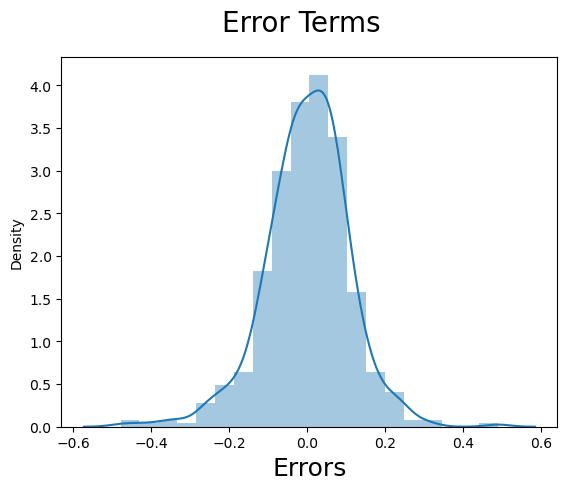

In [70]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### 7.4 Scaling the Test Dataset

In [71]:
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
X_train_new=X_train_rfe6.drop(['const'], axis=1)

In [74]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
#Making predictions on the chosen model

y_pred = lm6.predict(X_test_new)

#### 7.5  Analysis of  Predicted variable with Test Data  using Scatter Plot

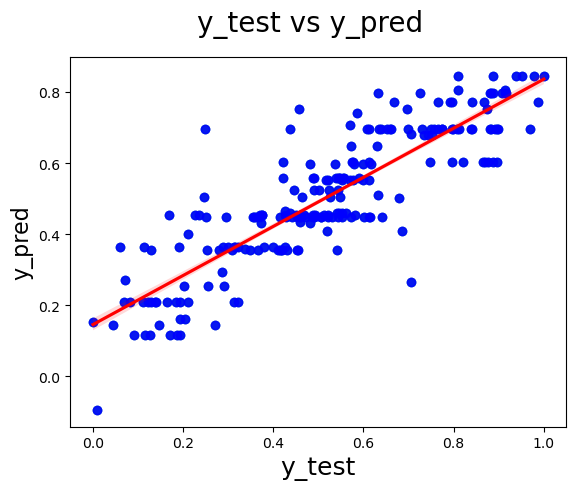

In [76]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### 8. Interpret the Predict Results

#### 8.1 Importing mean_squated_error module from sklearn

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### 8.2 Calculating mean squared error using following  Code

In [78]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.12089703082288683

#### 8.3 Calculation of R^2 for test dataset

In [79]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7440203789163099

In [80]:
X_t=X_train_new.iloc[:,0].values

#### 8.4 Analysis of Adjusted R-squared using the formula

In [81]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7049498051719572

In [82]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.87e-149
Time:                        22:56:35   Log-Likelihood:                 407.17
No. Observations:                 510   AIC:                            -792.3
Df Residuals:                     499   BIC:                            -745.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4482      0.010     44.508      

## Final Result Comparison

- Train R^2 :0.764
- Train Adjusted R^2 :0.759
- Test R^2 :0.744
- Test Adjusted R^2 :0.704
- This seems to be a really good model that can very well 'Generalize' various datasets.

### The Equayion of best fitted Line is given below
- (0.246 X yr) -( 0.091 X holiday) - (0.239 X Spring) -  (0.302 X Light Snow) - (0.092 X Mist Cloudy) + (0.045 X 3) + (0.077 X 5) + (0.103 X 6) +  (0.109 X 8) + (0.149 *x 9) 

 
### 1. From your analysis of the categorical variables from the dataset, what could you infer about  their effect on the dependent variable?  
- We can observe that the demand for bikes depends on following variables:
    - yr, holiday, Spring,  Light Snow, Mist Cloudy, 3, 5, 6, 8 and 9
    - Demands increases in the month of 3, 5, 6, 8  and 9
    - yr, holiday, Spring, Light Snow, Mist Cloudy, 3, 5, 6, 8 and 9 
- Demands increases in the month of 3, 5, 6, 8 and 9 
- The demad of bike is less in the month of spring when compared with other seasons 
- Bike demand in the fall is the highest.
- Bike demand takes a dip in spring.
- Bike demand in year 2019 is higher as compared to 2018.
- Bike demand is high if weather is clear or with mist cloudy while it is low whenthere is light rain or light snow
- The demad of bike is less in the month of spring when compared with other seasons


### 2. Why is it important to use drop_first=True during dummy variable creation? 

- In machine learning and statistical modeling, it is common to encode categorical variables as binary dummy variables.
- Each category is represented by a separate binary variable that takes a value of 1 if the observation belongs to that category and 0 otherwise.
- When creating dummy variables, it is important to use drop_first=True in order to avoid the problem of multicollinearity, which occurs when one of the dummy variables can be perfectly predicted from the others. 
- This means that including all the dummy variables in a model will cause problems with estimation and interpretation of the model's coefficients.

### 3.  Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
- **atemp** and **temp** both have same and highest among all numerical variables

### 4. How did you validate the assumptions of Linear Regression after building the model on the training set?
- The assumptions of Linear Regression after building the model on the training set is possible by **plotting the scatter plot between the features and the target variables** 

### 5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
- The top 3 features contributing significantly are:
    - weathersit_Light_Snow(negative correlation).
    - yr(Positive correlation).
    - month(Positive correlation).